# <a id='toc1_'></a>[Exploring data for building the dataset MSH-Tanzanina](#toc0_)

**Data sources** 
  - Data from the PAD API for the Project id=19 (MSH-Tanzania)
  - Data from the spreadsheet [MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx](MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx)
  - The table `double_blind` in [PAD Database](https://pad.crc.nd.edu/phpmyadmin/) database

**Table of contents**<a id='toc0_'></a>    
- [Exploring data for building the dataset MSH-Tanzanina](#toc1_)    
  - [1. The table `double_blind` in PAD Database   ](#toc1_1_)    
    - [Normalize the data in the `double_blind` table](#toc1_1_1_)    
  - [2. Data from the PAD API for the `Project id=19` (MSH-Tanzania)](#toc1_2_)    
    - [Filter the `double_blind` table based on data from the project 19](#toc1_2_1_)    
      - [Samples with `test_id` that are not in the `double_blind` table](#toc1_2_1_1_)    
  - [3. Data from the spreadsheet MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx      ](#toc1_3_)    
    - [Rearrange the data vertically (all analyses one dataframe )](#toc1_3_1_)    
    - [Normalize the names in the `sample_name` column](#toc1_3_2_)    
    - [Filter the `double_blind` table based on data from the spreadsheet](#toc1_3_3_)    
      - [Samples with `test_id` that are not in the `double_blind` table](#toc1_3_3_1_)    
  - [4. Data Recovery](#toc1_4_)    
  - [5. Visualizations](#toc1_5_)    
  - [6. Check if the 'processed_file_location' column has valid data](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>1. The table `double_blind` in [PAD Database](https://pad.crc.nd.edu/phpmyadmin/)    [&#8593;](#toc0_)
 
 The content of the table `double_blind` in the [PAD Database](https://pad.crc.nd.edu/phpmyadmin/) was exported into the file `double_blind.csv` and I loaded the data into the `pandas` dataframe to analyze the data.


In [1]:
import pandas as pd
double_blind_orig = pd.read_csv('data/raw/double_blind.csv')
print(double_blind_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5166 non-null   int64 
 1   sample_id        5166 non-null   int64 
 2   sample_name      5165 non-null   object
 3   sample_actual    5166 non-null   object
 4   quantity         5166 non-null   int64 
 5   quantity_actual  5166 non-null   int64 
 6   user_name        5165 non-null   object
 7   test_id          4772 non-null   object
 8   project          5166 non-null   object
dtypes: int64(4), object(5)
memory usage: 363.4+ KB
None


### <a id='toc1_1_1_'></a>[Normalize the data in the `double_blind` table](#toc0_)

In [2]:

# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
double_blind_orig['sample_actual'] = double_blind_orig['sample_actual'].str.strip()
double_blind_orig['sample_actual'] = double_blind_orig['sample_actual'].str.lower().str.replace(' ', '-', regex=False)


# Counting unique values to identify categories
print(double_blind_orig['sample_actual'].value_counts())

sample_actual
vitamin-c                                                   700
amoxicillin                                                 517
paracetamol                                                 432
benzyl-penicillin                                           359
penicillin-procaine                                         331
quinine                                                     317
lactose                                                     307
starch                                                      274
cellulose                                                   258
doxycycline                                                 193
acetominophen                                               148
paracetamol-starch                                          133
ceftriaxone                                                 121
ciprofloxacin                                               117
ampicillin                                                  115
metformin                 

## <a id='toc1_2_'></a>[2. Data from the PAD API for the `Project id=19` (MSH-Tanzania)](#toc0_)

In [3]:
import sys
sys.path.append('../../src')
from utils import get_project_data
import pandas as pd

project_id = 19
project_data = get_project_data(project_id)
deleted_data = project_data[project_data.deleted == True]
project_data = project_data[project_data.deleted == False]

# add test_id column based on notes
project_data['test_id'] = project_data.notes.apply(lambda x: x.split(', ')[-1])

# add test_id column based on notes
project_data['test_id'] = project_data.notes.apply(lambda x: x.split(', ')[-1])

# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
project_data['sample_name'] = project_data['sample_name'].str.strip()
project_data['sample_name'] = project_data['sample_name'].str.lower().str.replace(' ', '-', regex=False)


# Counting unique values to identify categories
print(project_data['sample_name'].value_counts())

sample_name
vitamin-c               663
paracetamol             354
benzyl-penicillin       347
penicillin-procaine     342
quinine                 324
amoxicillin             324
lactose                 244
cellulose               231
starch                  228
paracetamol-starch      121
unknown                  14
acetaminophen-starch      1
                          1
Name: count, dtype: int64


### <a id='toc1_2_1_'></a>[Filter the `double_blind` table based on data from the project 19](#toc0_)

In [4]:

# test_id's from spreadsheet
test_id_in_proj = project_data.test_id.to_list()
print(f"Total of test_id in the project 19: {len(test_id_in_proj)}")

# Filter double_blind_orig based on test_id_in_sheet
double_blind_proj = double_blind_orig[double_blind_orig.test_id.isin(test_id_in_proj)]
double_blind_proj.reset_index(drop=True, inplace=True)

print(f"Total of test_id in double_blind: {len(double_blind_proj)}")

Total of test_id in the project 19: 3194
Total of test_id in double_blind: 3124


Note: 
- There are `3124` samples in the `double_blind` table in the database out of `3194` in the project.


#### <a id='toc1_2_1_1_'></a>[Samples with `test_id` that are not in the `double_blind` table](#toc0_)

- Set of unique `test_id` in the projects and in the `double_blind` table

In [5]:
import numpy as np

# set of test_id's
test_id_proj = project_data[~project_data.sample_name.isin(['Unknown', '', 'unknown'])].test_id.unique()
test_id_database = double_blind_proj.test_id.unique()

# Convert arrays to sets
set_proj = set(test_id_proj)
set_db = set(test_id_database)

# Find items in test_id_proj not in test_id_database
unique_to_proj = set_proj - set_db

# Find items in test_id_database not in test_id_proj
unique_to_db = set_db - set_proj

print(f"{len(unique_to_proj)}: Unique to test_id in project 19:", unique_to_proj)
print(f"{len(unique_to_db)}: Unique to test_id in api:", unique_to_db)


12: Unique to test_id in project 19: {'T23-IVLB', 'T23-YOL0', 'T22-ZWPL', 'T22-NGF8', 'T22-XOFO', 'T22-IBFY', 'T25-ZY45', 'T22-C2OE', 'T36-AYOA', '9A7U', 'T22-965E', 'T23-UKUW'}
0: Unique to test_id in api: set()



## <a id='toc1_3_'></a>3. Data from the spreadsheet [MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx](MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx)       [&#8593;](#toc0_)
 

In [6]:
import pandas as pd

file_name = 'data/raw/MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.xlsx'
sheets = pd.ExcelFile(file_name).sheet_names
print(sheets)

['Tanzania Reads', 'SB Reads']


In [7]:
# Getting the first sheet
sheet = pd.read_excel(file_name, sheet_name='Tanzania Reads')
# sheet.info()

# Number of analysts  
num_analysts = len(sheet.columns) // 13 + 1
print(f"Number of analysts: {num_analysts}")

# Number of olumns an rows 
print(f"Number Columns: {len(sheet.columns)}")
print(f"Number of rows: {len(sheet)}")

# all columns
print(f"{sheet.columns}")

Number of analysts: 20
Number Columns: 259
Number of rows: 152
Index(['Analyst 21', 'Sample ID', 'Labelled As', 'Actual Identity',
       'Identified As', 'Suspicious Because of Lanes…', 'Unnamed: 6',
       'Unnamed: 7', 'Starch Present?', 'PAD #',
       ...
       'Labelled As.19', 'Actual Identity.19', 'Identified As.19',
       'Suspicious Because of Lanes….19', 'Unnamed: 253', 'Unnamed: 254',
       'Starch Present?.19', 'PAD #.19', 'Date Analyzed.19', 'Comments.19'],
      dtype='object', length=259)


/home/pmoreira/TAI/Users/pmoreira/pad_dataset_registry/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Notes:
- There is a set of 12 columns for each one of the 20 analysts and a blank colum just after each set.
- This gives a total of 259 columns.
- In the next Section, I will concatenate the columns to have a single column with the reads for all analysts.

### <a id='toc1_3_1_'></a>[Rearrange the data vertically (all analyses one dataframe )](#toc0_)


In [8]:
import pandas as pd

# Identify the number of analysts
num_analysts = (len(sheet.columns) // 13) + 1   # Assuming each analyst has 10 columns

# Create a list to store the reshaped data
reshaped_data = []
end_col = 0
# Iterate through each analyst's columns and reshape the data
for i in range(num_analysts):
    # start_col = i  * end_col 
    start_col = end_col 
    end_col = start_col + 13
    end_part1_col = start_col + 5
    start_part2_col = start_col + 8
    
    analyst_data_part_1 = sheet.iloc[:, start_col:end_part1_col]
    analyst_data_part_2 = sheet.iloc[:, start_part2_col:end_col-1]
    analyst_data = pd.concat([analyst_data_part_1, analyst_data_part_2], axis=1)
    
    analyst_data.columns = ['row', 'test_id', 'labelled_as', 'actual_identity', 'identified_as', 'starch_present', 'sample_id', 'date_analyzed', 'comments']

    # Insert 'Analyst' column at the beginning
    analyst_data.insert(0, 'analyst', analyst_data_part_1.columns[0])  

    # Convert non-finite values (NA or inf) to NaN in 'PAD #' column
    analyst_data['sample_id'] = pd.to_numeric(analyst_data['sample_id'], errors='coerce')
    
    # Change the data type of 'PAD #' column to integer
    analyst_data['sample_id'] = analyst_data['sample_id'].astype('Int64')
    
    # Drop rows where 'row' column is NaN
    analyst_data.dropna(subset=['row'], inplace=True)
    
    analyst_data.test_id = analyst_data.test_id.astype(str)
    analyst_data["test_id"] = analyst_data.test_id.apply(lambda test_id: test_id.split('\xa0')[0])
    
    reshaped_data.append(analyst_data)
    
# Concatenate all the reshaped dataframes into one
sheet = pd.concat(reshaped_data)

# Reset index
sheet.reset_index(drop=True, inplace=True)


### <a id='toc1_3_2_'></a>[Normalize the names in the `sample_name` column](#toc0_)

In [9]:
# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
sheet['actual_identity'] = sheet['actual_identity'].str.strip()
sheet['actual_identity'] = sheet['actual_identity'].str.lower().str.replace(' ', '-', regex=False)


# Counting unique values to identify categories
print(sheet['actual_identity'].value_counts())

# save to file
sheet.to_csv('data/intermediate/MSH-Tanzania-PAD-Summary-of-reads-by-TFDA-and-SB.csv', index=False)

actual_identity
vitamin-c              648
paracetamol            329
benzyl-penicillin      327
penicillin-procaine    313
quinine                306
amoxicillin            302
lactose                227
cellulose              219
starch                 216
paracetamol-starch     113
Name: count, dtype: int64


New configuration

In [10]:
# Columns
print(f"Number Columns: {len(sheet.columns)}")
print(f"{sheet.columns}")
sheet.info()

Number Columns: 10
Index(['analyst', 'row', 'test_id', 'labelled_as', 'actual_identity',
       'identified_as', 'starch_present', 'sample_id', 'date_analyzed',
       'comments'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   analyst          3000 non-null   object 
 1   row              3000 non-null   float64
 2   test_id          3000 non-null   object 
 3   labelled_as      3000 non-null   object 
 4   actual_identity  3000 non-null   object 
 5   identified_as    2999 non-null   object 
 6   starch_present   256 non-null    object 
 7   sample_id        2998 non-null   Int64  
 8   date_analyzed    2999 non-null   object 
 9   comments         216 non-null    object 
dtypes: Int64(1), float64(1), object(8)
memory usage: 237.4+ KB


### <a id='toc1_3_3_'></a>[Filter the `double_blind` table based on data from the spreadsheet](#toc0_)

In [11]:
# test_id's from spreadsheet
test_id_in_sheet = sheet.test_id.to_list()
print(f"Total of test_id in the spreadsheet: {len(test_id_in_sheet)}")

assert sheet.test_id.nunique() == len(test_id_in_sheet), "Test_id's are not unique"

# Filter double_blind_orig based on test_id_in_sheet
double_blind_sheet = double_blind_orig[double_blind_orig.test_id.isin(test_id_in_sheet)]
double_blind_sheet.reset_index(drop=True, inplace=True)

print(f"Total of test_id in double_blind: {len(double_blind_sheet)}")

Total of test_id in the spreadsheet: 3000
Total of test_id in double_blind: 2955


Note: 
- There are 45 samples in the spreadsheet that are not in the `double_blind` table in the database.
- I will investigate the data to understand the reason of this issue.

#### <a id='toc1_3_3_1_'></a>[Samples with `test_id` that are not in the `double_blind` table](#toc0_)

- Set of unique `test_id` in the spreadsheet and in the `double_blind` table

In [12]:
import numpy as np

# set of test_id's
test_id_sheet = sheet.test_id.unique()
test_id_db = double_blind_sheet.test_id.unique()

# Convert arrays to sets
set_sheet = set(test_id_sheet)
set_db = set(test_id_db)

# Find items in test_id_sheet not in test_id_db
unique_to_sheet = set_sheet - set_db

# Find items in test_id_api not in test_id_sheet
unique_to_db = set_db - set_sheet

print("Unique test_id in the sheet:", unique_to_sheet)
print("Unique test_id in the double_blind:", unique_to_db)


Unique test_id in the sheet: {'T29-15L1', 'T22-SL6O', 'T28-H23F', 'T22-C2OE', 'T40-CXC2', 'T29-ED85', 'T30-JZLF', 'T23-UKUW', 'T35-C8W3', 'T30-LYIW', 'T24-CSGI', 'T27-81GH', 'T33-8BGS', 'T26-J8W0', 'T30-QGDT', 'T22-XOFO', 'T24-R8H2', 'T40-KBIF', 'T24-IAC2', 'T25-ZY45', 'T22-ZWPL', 'T36-QW09', 'T29-M6OD', 'T40-690O', 'T25-WKEG', 'T25-18LM', 'T28-4LFY', 'T23-8ALY', 'T40-R9MD', 'T22-IBFY', 'T36-W0C1', 'T36-AYOA', 'T22-9A7U', 'T22-965E', 'T22-JK6J', 'T23-IVLB', 'T23-YOL0', 'T27-XLID', 'T26-0AJB', 'T22-NGF8', 'T23-KLOF', 'T25-E3KG', 'T23-K8KE', 'T36-F92L', 'T28-VB0R'}
Unique test_id in the double_blind: set()


- samples in the sheet can be in the project 19, but they are not in the `double_blind` table in the database.

In [13]:
print(unique_to_proj  - unique_to_sheet)
project_data[project_data.test_id.isin(list(unique_to_proj  - unique_to_sheet))]

{'9A7U'}


,id,sample_name,test_name,user_name,date_of_creation,raw_file_location,processed_file_location,processing_date,camera_type_1,notes,...,project.annotation,project.test_name,project.sample_names.sample_names,project.neutral_filler,project.qpc20,project.qpc50,project.qpc80,project.qpc100,project.notes,test_id
1066,10522,amoxicillin,12LanePADKenya2015,Analyst 22,2018-11-29T19:48:20,/var/www/html/images/padimages/raw/10000/10522...,/var/www/html/images/padimages/processed/10000...,2018-12-05T21:52:30,unknown,"Basket 1 PAD Photos, 9A7U",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,9A7U


## <a id='toc1_4_'></a>[4. Data Recovery](#toc0_)

In [14]:
# project_data
# double_blind_orig

# find the `id` in project data for the correspondent samples in the spreadsheet
# Note: Samples can be in project_data and/or double_blind_orig, otherwise they are lost.

recovered_idx = []
lost_sample_idx = []
no_flocation_idx = []
is_only_in_project_data_idx = []

for i, row in sheet.iterrows():
    
    # is test_id in project 19 data recovered from the PAD API?
    test_id_isin_api = project_data.test_id.isin([row.test_id, row.test_id.split('-')[-1]]).sum()
    
    # is test_id in double_blind_orig table in the database?
    test_id_isin_db = row.test_id in double_blind_orig.test_id.to_list()
    
    # is test_id in both?
    if (test_id_isin_api) and (test_id_isin_db):
        
        # same `test_id` and `id` in double_blind and project_data
        double_blind_sample = double_blind_orig[double_blind_orig.test_id == row.test_id]
        project_sample = project_data[  (project_data.test_id.isin([row.test_id, row.test_id.split('-')[-1]])) & 
                                        (project_data.id == double_blind_sample.id.values[0]) &
                                        (project_data.sample_name == row.actual_identity) ]
        
        # has `processed_file_location` in project_data
        if project_sample.processed_file_location.values[0]:
            url = f"https://pad.crc.nd.edu/{project_sample.processed_file_location.values[0]}"
            
            assert len(double_blind_sample) != 0, f"No entry for {row.test_id} in double_blind_sample"
            assert len(double_blind_sample) == 1, f"Multiple entries for {row.test_id} in double_blind"
            assert len(project_sample) != 0, f"No entry for {row.test_id} in project_data"
            assert len(project_sample) == 1, f"Multiple entries for {row.test_id} in project_data\n{project_sample}"
            
            ### Same `sample_id` (Note: sample_id in the spreadsheet is incorrect, so I only compare double_blind to the proj 19)
            str_info = f"{row.test_id}: database:{double_blind_sample.sample_id.values[0]} != Proj-API:{project_sample.sample_id.values[0]}\nURL: {url}"
            assert double_blind_sample.sample_id.values[0] == project_sample.sample_id.values[0], str_info
            # if double_blind_sample.sample_id.values[0] != project_sample.sample_id.values[0]:
            #     print("issue: sample_id"); print(str_info, "\n")
            
            ### Same `actual_identity`, `sample_name`
            str_info = f"{row.test_id}: Sheet: {row.actual_identity} != Proj_API: {project_sample.sample_name.values[0]}\nURL: {url}"
            assert row.actual_identity == project_sample.sample_name.values[0], str_info
            # if row.actual_identity != project_sample.sample_name.values[0]:
            #     print("issue: actual_identity"); print(str_info, "\n")
            
            ### Same `actual_identity` and `sample_actual`
            str_info = f"{row.test_id}:  Sheet: {row.actual_identity} != double_blind: {double_blind_sample.sample_actual.values[0]}\nURL: {url}"
            assert row.actual_identity == double_blind_sample.sample_actual.values[0], str_info
            # if row.actual_identity != double_blind_sample.sample_actual.values[0]:
            #     print("issue: actual_identity"); print(str_info, "\n")
            
            # sample recovered in `project_data` using the `test_id` from the spreadsheet
            recovered_idx.append(project_sample.index.values[0])
            
        # has no `processed_file_location` in project_data, it will not enter in the dataset
        else:
            no_flocation_idx.append(project_sample.index.values[0])
            print(f"issue: no processed_file_location - {row.test_id}\n")
    
    # is only in project_data
    elif (test_id_isin_api) and (not test_id_isin_db):
        #print(f"{row.test_id} in project_data api  XXX")
        
        # recover sample by test_id (extracted from notes) and test_id (extracted from the spreadsheet) 
        project_sample = project_data[  (project_data.test_id.isin([row.test_id, row.test_id.split('-')[-1]])) & 
                                        (project_data.sample_name == row.actual_identity) ]
        
        # one and only one sample should be found
        assert len(project_sample) != 0, f"No entry for {row.test_id} in project_data"
        assert len(project_sample) == 1, f"Multiple entries for {row.test_id} in project_data\n{project_sample}"
        
        # `sample_id` in Sheet should be the same value in project_data
        assert row.sample_id == project_sample.sample_id.values[0], \
            f"{row.test_id}: database:{row.sample_id} != Proj-API:{project_sample.sample_id.values[0]}\
                \nURL: https://pad.crc.nd.edu/{project_sample.processed_file_location.values[0] if project_sample.processed_file_location.values[0] else '' }"
        
        # has `processed_file_location` in project_data
        if project_sample.processed_file_location.values[0]:
            
            # sample recovered in `project_data` using the `test_id` from the spreadsheet
            recovered_idx.append(project_sample.index.values[0])
            
            is_only_in_project_data_idx.append(project_sample.index.values[0])
            # url = f"id={project_sample.id.values[0]} https://pad.crc.nd.edu/{project_sample.processed_file_location.values[0]}"      
            # print("row ", row.sample_id, row.test_id, row.actual_identity)
            # print("proj ", project_sample.sample_id.values[0], project_sample.test_id.values[0], project_sample.sample_name.values[0], project_sample.notes.values[0])
            # print(url)
            # # print()
            
        else:
            no_flocation_idx.append(project_sample.index.values[0])
            print(f"issue: no processed_file_location - {row.test_id}\n")
        # 
        
    # is not in both    
    if (not test_id_isin_api) and (not test_id_isin_db):
        lost_sample_idx.append(i)
        print(f"issue: LOST  - {row.test_id}\n")

# recovered data
data = project_data.iloc[recovered_idx]
data.to_csv('data/processed/recovered_data.csv', index=False)

# save some issues in files
lost_samples = sheet.iloc[lost_sample_idx]
lost_samples.to_csv('data/intermediate/issues/lost_samples.csv', index=False)
processed_file_location_none = project_data.iloc[no_flocation_idx]
processed_file_location_none.to_csv('data//intermediate/issues/processed_file_location_none.csv', index=False)
only_in_project_data = project_data.iloc[is_only_in_project_data_idx]
only_in_project_data.to_csv('data/intermediate/issues/only_in_project_data.csv', index=False)

issue: LOST  - T22-SL6O

issue: LOST  - T22-JK6J

issue: no processed_file_location - T23-3WC8

issue: LOST  - T23-K8KE

issue: LOST  - T23-KLOF

issue: LOST  - T23-8ALY

issue: LOST  - T24-R8H2

issue: LOST  - T24-CSGI

issue: no processed_file_location - T24-84JN

issue: no processed_file_location - T24-6VM7

issue: LOST  - T24-IAC2

issue: LOST  - T25-WKEG

issue: LOST  - T25-18LM

issue: LOST  - T25-E3KG

issue: LOST  - T26-J8W0

issue: LOST  - T26-0AJB

issue: LOST  - T27-81GH

issue: LOST  - T27-XLID

issue: LOST  - T28-H23F

issue: LOST  - T28-4LFY

issue: LOST  - T28-VB0R

issue: LOST  - T29-15L1

issue: LOST  - T29-M6OD

issue: LOST  - T29-ED85

issue: LOST  - T30-QGDT

issue: LOST  - T30-JZLF

issue: LOST  - T30-LYIW

issue: no processed_file_location - T31-LQEB

issue: no processed_file_location - T33-QTAG

issue: no processed_file_location - T33-DE1O

issue: LOST  - T33-8BGS

issue: no processed_file_location - T33-13DZ

issue: no processed_file_location - T33-HVPN

issue: 

In [15]:
print(f"{data.shape[1]} columns and {data.shape[0]} samples")
data.head(5)

27 columns and 2949 samples


,id,sample_name,test_name,user_name,date_of_creation,raw_file_location,processed_file_location,processing_date,camera_type_1,notes,...,project.annotation,project.test_name,project.sample_names.sample_names,project.neutral_filler,project.qpc20,project.qpc50,project.qpc80,project.qpc100,project.notes,test_id
2586,12095,amoxicillin,12LanePADKenya2015,analyst 21,2018-11-29T20:39:26,/var/www/html/images/padimages/raw/10000/12095...,/var/www/html/images/padimages/processed/10000...,2018-11-29T20:39:26,unknown,"Basket 2 PAD Photos, T21-SYHF",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,T21-SYHF
2681,12195,amoxicillin,12LanePADKenya2015,analyst 21,2018-11-29T20:40:26,/var/www/html/images/padimages/raw/10000/12195...,/var/www/html/images/padimages/processed/10000...,2018-11-29T20:40:26,unknown,"Basket 1 PAD Photos, T21-AL9Z",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,T21-AL9Z
2606,12115,amoxicillin,12LanePADKenya2015,analyst 21,2018-11-29T20:39:38,/var/www/html/images/padimages/raw/10000/12115...,/var/www/html/images/padimages/processed/10000...,2018-12-06T11:45:47,unknown,"Basket 3 PAD Photos, T21-7YCI",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,T21-7YCI
2677,12191,amoxicillin,12LanePADKenya2015,analyst 21,2018-11-29T20:40:24,/var/www/html/images/padimages/raw/10000/12191...,/var/www/html/images/padimages/processed/10000...,2018-11-29T20:40:24,unknown,"Basket 1 PAD Photos, T21-QEAZ",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,T21-QEAZ
2625,12134,amoxicillin,12LanePADKenya2015,analyst 21,2018-11-29T20:39:50,/var/www/html/images/padimages/raw/10000/12134...,/var/www/html/images/padimages/processed/10000...,2018-11-29T20:39:50,unknown,"Basket 3 PAD Photos, T21-PZ1G",...,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,,T21-PZ1G


## <a id='toc1_5_'></a>[5. Visualizations](#toc0_)

- Distribution of classes in the data recovered 

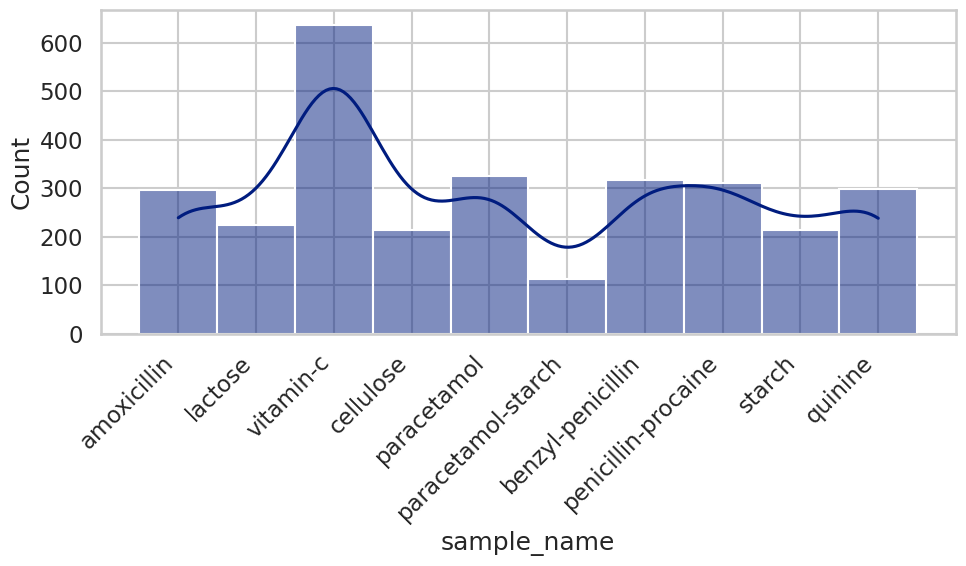

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette("dark")

# Create the plot
plt.figure(figsize=(10, 6))

plot = sns.histplot(data=data, x='sample_name', kde=True)

xticklabels = plot.get_xticklabels()
plot.set_xticks(range(len(xticklabels)))
plot.set_xticklabels(xticklabels, rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

- some pad images 

In [17]:
def sample_n_per_category(df, category_column, n):
    """
    Sample n random rows from each category in a given category_column within DataFrame df.

    :param df: DataFrame to sample from.
    :param category_column: Column in DataFrame to group by (categorical variable).
    :param n: Number of samples to take from each category.
    :return: DataFrame with n random rows from each category.
    """
    def sample_n(df_group, n):
        return df_group.sample(n=min(len(df_group), n))
    
    return df.groupby(category_column, group_keys=False).apply(sample_n, n=n)


In [18]:
import ipyplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

label_column = 'sample_name'
df = sample_n_per_category(data, 'sample_name', 50)

# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
df['url'] = base_url + df['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = df['url'].values
labels = df[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = df[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, img_width=150
)

plt.show() 

## <a id='toc1_6_'></a>[6. Check if the 'processed_file_location' column has valid data](#toc0_)

In [19]:
import requests 

df = data.copy()  
# Check if the 'processed_file_location' column has valid data
if 'processed_file_location' in df:
    # Concatenate to get the full image URLs
    df['url'] = base_url + df['processed_file_location']
    
    # Check if URLs are formed correctly
    for url in df['url']:
        #print(f"Checking URL: {url}")
        # Try to access the image
        response = requests.head(url, verify=False)
        if response.status_code == 200:
            continue
            print(f"URL is good: {url}")
        else:
            print(f"URL is bad: {url}, Status Code: {response.status_code}")
else:
    print("DataFrame doesn't contain 'processed_file_location' column.")
